<a href="https://colab.research.google.com/github/aaron-v19/practice/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch workflow


In [ ]:
import torch
import torch.nn as nn   # nn contains all of PyTorch's building blocks for neural networks
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
what_we_are_learning={1:"data (prepare and load)",
                      2:"building model",
                      3:"fitting model",
                      4:"making predictions and evaluating model",
                      5:"saving and loading model",
                      6:"putting it all together"
}
what_we_are_learning

{1: 'data (prepare and load)',
 2: 'building model',
 3: 'fitting model',
 4: 'making predictions and evaluating model',
 5: 'saving and loading model',
 6: 'putting it all together'}

# Data (preparing and loading)

data can be anything

*Excel spreadsheet

*Images

*Videos

*Audio

*Text

*Custom data

*Dna

Machine learning is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this lets create some known data using linear regression formula

We'll use linear reg formula to make a straight line with *known* **parameters**

In [ ]:
# create *known* parameters
weight=0.7
bias=0.3

#create
start =0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

##Splitting data into test and training data and validation set

Let create training and testing set

In [ ]:
#create a train test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

#How to visualize the data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")

  #plt test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")

  #Are there predictions?
  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":16})

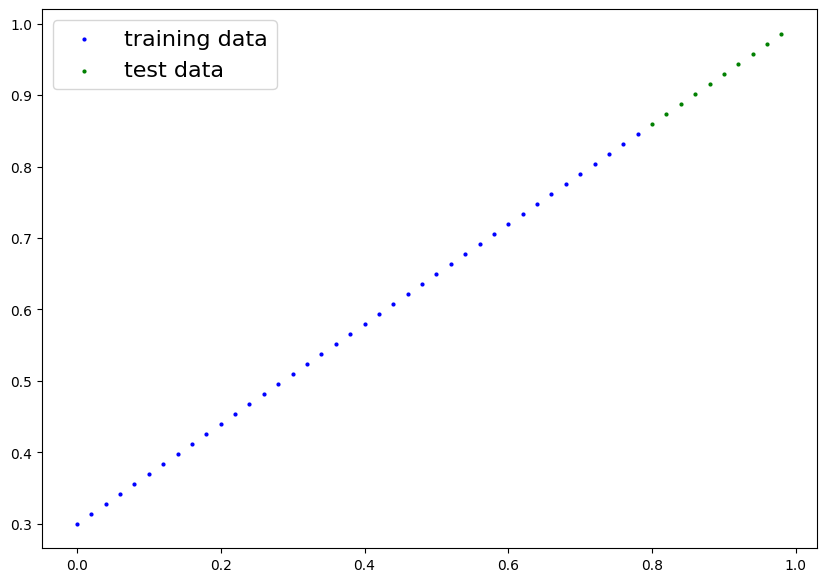

In [ ]:
plot_predictions();

## Building our first model

what our model does ⚛

*start with rand val

*look at training data and adjust the random values to better represent the ideal values

In [ ]:
#Create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,  #<- start with rand val and adjust to ideal val
                                          requires_grad=True,#<-can this paramter be updated via gradient descent
                                          dtype=torch.float)) #<- Just data type,  pytorch prefers float32
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=float))

  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor):
    return self.weights*x+self.bias  #linear regression formula




#PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking contents of our pytorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using 'parameters()'.

In [ ]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0=LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction using torch.inference_mode()
To check our model's predictive power 'lets see how well it predicts y_test based on X_test.

When we pass data through our model, it's going to run it through the forward() method

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)

#you can also use something similar with torch.no_grad() but inference mode is preferred
#with torch.no_grad():
#  y_preds=model_0(X_test)


In [ ]:
y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], dtype=torch.float64),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

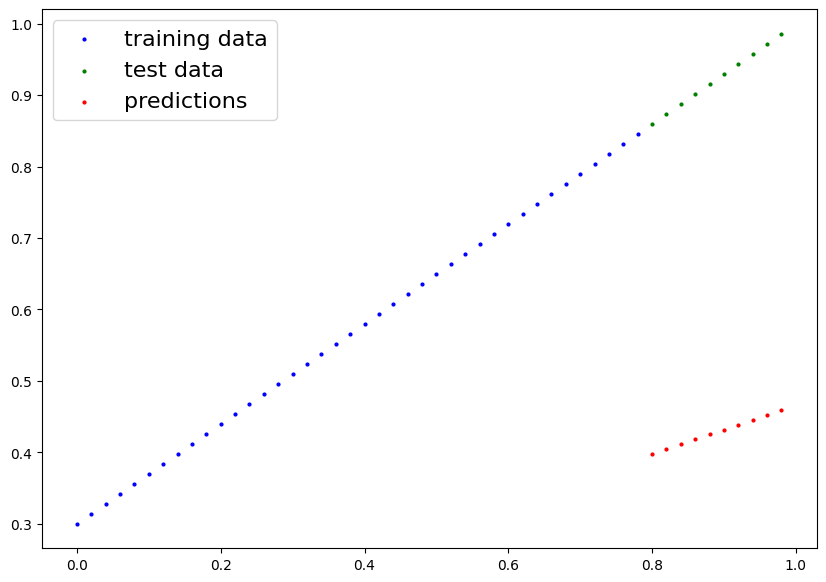

In [ ]:
plot_predictions(predictions=y_preds)


#Training model

The whole idea of training is for a model to move from some unknown paramters to some known parameters.

Or in other words from poor representaion of data to better representation of data.

One way to measure how wrong your models predictions are is to use a loss function.

To do so, we need some way to measure how wrong our model's predictions are.

*Loss function may also be called cost function or criterion in different areas.

* **Loss function** measures how wrong your models predictions are to the ideal outputs, lower the output the better
* **Optimizer** : Takes into account the loss of a model and adjusts the model's parameters (weight and bias) to improve the loss of the model.

And specifically for Pytorch we need:
  * A training loop
  * A testing loop

In [ ]:
#setup Loss function
loss_fn=nn.L1Loss()

#setup An Optimizer(Stochastic Gradient Descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01) #lr=learing rate=possibly the most important hyperparameter you can set


Q: Which loss function and optimizer should I use?

A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

##Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data and do...

1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent - https://youtu.be/IHZwWFHWa-w)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
#an epoch is one loop through the data ... (this is a hyperparameter because we've set it ourselves )
epochs=200

#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

#0. Loop thorugh the data
for epoch in range(epochs):
    #set the model to train mode
    model_0.train()  #train mode

    #1.Forward Pass
    y_pred=model_0(X_train)

    #2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    #3.Optimizer Zero Gradient
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss wrt to the parameters of the model
    loss.backward()

    #5. Step the optimizer (perform greadient descent)
    optimizer.step() #by default how the optimizer changes will accumulate through the loop so ... so we have to zero them above in step 3 for the next iteration of the loop
    #testing
    model_0.eval()#turns of gradient tracking so that evaluation doesn't modify the model parametrs
    with torch.inference_mode():
      #1. Do the forward pass
      test_pred=model_0(X_test)

      #2. Calc the loss
      test_loss=loss_fn(test_pred,y_test)

      #printout
      if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch} | Loss:{loss}| Test Loss:{test_loss}")
        #print out model state_dict
        print(model_0.state_dict())

Epoch:0 | Loss:0.3128813517678373| Test Loss:0.4810651795382455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch:10 | Loss:0.19767138632506426| Test Loss:0.346355255078788
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch:20 | Loss:0.08908726094682914| Test Loss:0.21729659528684148
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch:30 | Loss:0.05314853437903411| Test Loss:0.14464020247411263
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch:40 | Loss:0.045437965798191725| Test Loss:0.11360953504991064
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch:50 | Loss:0.04167863324115598| Test Loss:0.09919951553296583
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843], dtype=torch.float64))])
Epoch:60 | Loss:0.03818932177440422| T

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

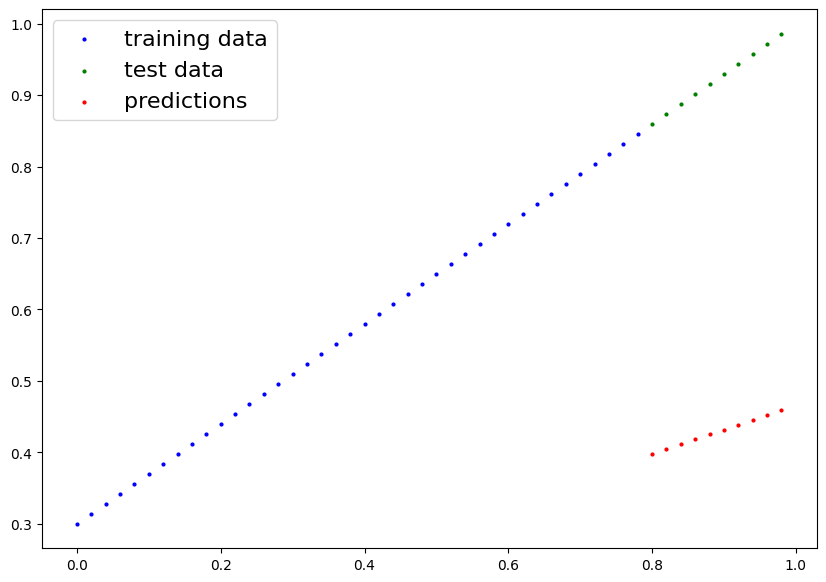

In [ ]:
plot_predictions(predictions=y_preds)

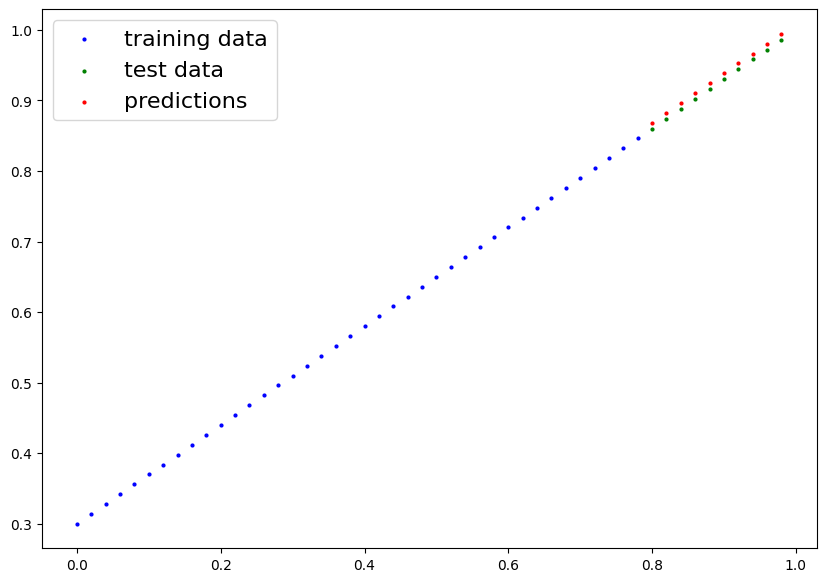

In [ ]:
plot_predictions(predictions=y_preds_new)

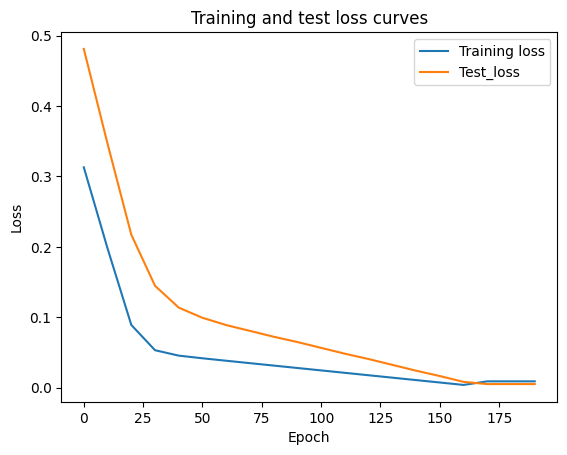

In [ ]:
#plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Training loss")
plt.plot(epoch_count,test_loss_values,label="Test_loss")
plt.title("Training and test loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

#Saving a Model in pytorch

There are three main methods you should be aware of when saving and loading models in PyTorch

1. torch.save() - allows you to save a PyTorch object in Python's pickle format
2. torch.load() - allows you to load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - this allows you to load a model's saved state dictionary


In [ ]:
from pathlib import Path
#1. saving our Pytorch model
MODEL_PATH=Path("/content/drive/MyDrive/PracticeModels")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create Model
MODEL_NAME="Pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3. Save Model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: /content/drive/MyDrive/PracticeModels/Pytorch_workflow_model_0.pth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading a Pytorch Model

Since we saved our model's state_dict() rather than the entire model, we need to create an instance of the model first and then load in the state_dict() in that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [ ]:
#To load a saved state we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

#Load the saved state_dict() of model_0 to the above
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [ ]:
#make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loade_model_preds=loaded_model_0(X_test)

loade_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [ ]:
y_preds_new==loade_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
##